### Import the Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')


### Load the Dataset

In [4]:
#Loading the dataset into data variable
data = pd.read_csv("C:\\Users\\adnan\\Downloads\\Churn_Modelling.csv")

In [5]:
#Printing the rows and columns the dataset
data.shape

(10000, 14)

In [6]:
#Printing the first 5 rows from the dataset
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Getting the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#statistical representation of the dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
#Checking the datatypes of each attributes
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Data Preprocessing

In [11]:
#checking if there is any missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
#droping the columns
data.drop(columns = ['Surname','RowNumber'],inplace = True,axis = 1)

In [13]:
#importing the library for Label Encoding
from sklearn.preprocessing import LabelEncoder

In [14]:
#Fitting it into variable
le = LabelEncoder()

In [15]:
#Performing the label Encoding on Geography and Gender attributes
data['Geography'] = le.fit_transform(data['Geography'].values)
data['Gender'] = le.fit_transform(data['Gender'].values)


In [16]:
#importing the library
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

#Fit and transform the Data
data_standardized = data.copy()
data_standardized[['CreditScore','Age','Balance','EstimatedSalary']] = standard_scaler.fit_transform(data[['CreditScore','Age','Balance','EstimatedSalary']])

### Exploratory Data Analysis

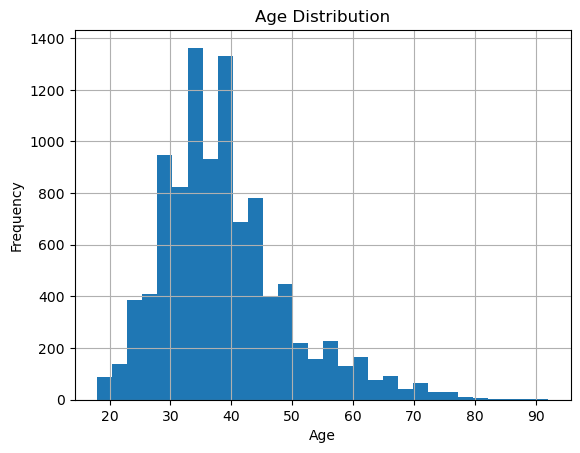

In [18]:
data['Age'].hist(bins = 30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

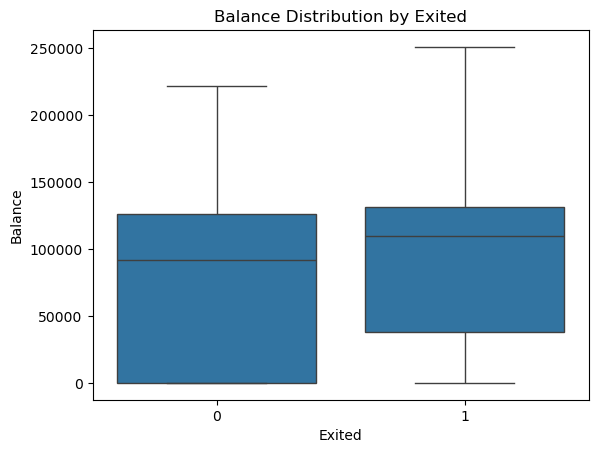

In [19]:
sns.boxplot(x='Exited',y='Balance',data=data)
plt.title('Balance Distribution by Exited')
plt.show()

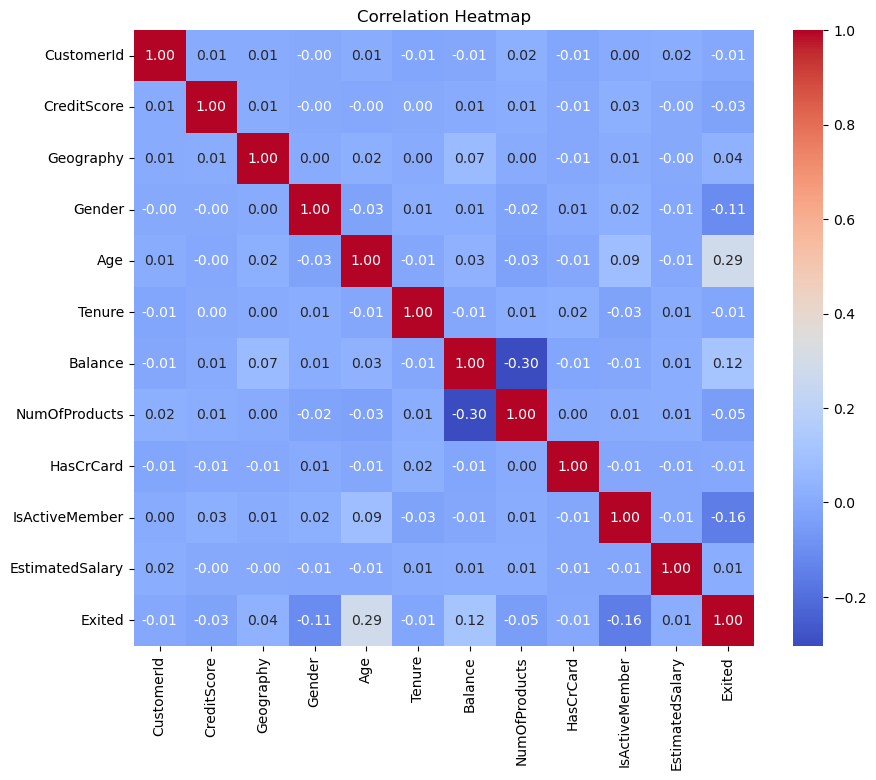

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True,fmt = '.2f',cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Divide Data into X an Y Variables

In [22]:
X = data.drop(columns = ['Exited'],axis = 1)
y = data['Exited']

### Split Data into Train and Test Parts

In [24]:
#importing the library
from sklearn.model_selection import train_test_split

#splits the dataset into training and testing sets with a 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [25]:
#checking count of the dataset
class_frequencies = data['Exited'].value_counts()

#Displaying the count
print(class_frequencies)

Exited
0    7963
1    2037
Name: count, dtype: int64


In [26]:
#importing the library
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a fixed random state
smote = SMOTE(random_state = 42)

#Generate resampled datasets to balance class distribution.
x_resampled,y_resampled = smote.fit_resample(X,y)

In [27]:
print("resampled class Distribution:")
print(pd.Series(y_resampled).value_counts())

resampled class Distribution:
Exited
1    7963
0    7963
Name: count, dtype: int64


### Training Model

#### Logistic Regression

In [30]:
#importing the library
from sklearn.linear_model import LogisticRegression

In [31]:
#Loading the model in variable
LR = LogisticRegression(penalty = 'l2',C = 0.01)

In [32]:
#Training the model using x_train and y_train
LR.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [33]:
pred_LR = LR.predict(X_test)

In [34]:
LR.score(X_test,y_test)

0.8053333333333333

In [35]:
#Importing the library
from sklearn.metrics import accuracy_score

In [36]:
#calculates Accuracy of Training data
train_accuracy = accuracy_score(y_train,LR.predict(X_train))
print(train_accuracy)

0.7924285714285715


In [37]:
#predicts Accuracy of Testing Data
y_pred = LR.predict(X_test)

#calculates Accuracy Of Testing Data
test_accuracy = accuracy_score(y_test,y_pred)

#Displays the Accuracy of Testing Data
print(test_accuracy)

0.8053333333333333


In [38]:
#importing the library
from sklearn.metrics import classification_report

#Displays classification report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



### Random Forest

In [40]:
#importing the library
from sklearn.ensemble import RandomForestClassifier

In [41]:
# loading model in variable
RF = RandomForestClassifier(n_estimators = 100,random_state = 42,min_samples_leaf = 5,min_samples_split = 10,max_leaf_nodes = 10)

In [42]:
#Training the model using x_train and y_train
RF.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=10, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [43]:
pred_RF = RF.predict(X_test)

In [44]:
#calculates Accuracy of Training data
train_accuracy = accuracy_score(y_train,RF.predict(X_train))
print(train_accuracy)

0.8477142857142858


In [45]:
#predicts Accuracy of Testing Data
y_pred = RF.predict(X_test)

#calculates Accuracy Of Testing Data
test_accuracy = accuracy_score(y_test,y_pred)

#Displays the Accuracy of Testing Data
print(test_accuracy)

0.8533333333333334


In [46]:
#Displays classification report
print(classification_report(y_test,pred_RF))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2416
           1       0.85      0.30      0.44       584

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000

